shape of Y (10,)
(10, 2)
(10, 2)
(10, 10)
(10,)


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

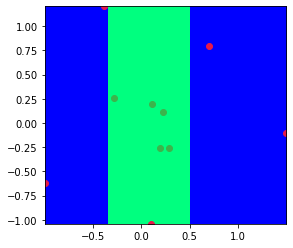

In [87]:

import sys
sys.path.append('..')
import numpy as np
from utils import get_classification_data, visualise_predictions
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

X,Y =get_classification_data(m=10, noise=0.3, variant='circles')
#print(len(X))
print("shape of Y",Y.shape)

tree= DecisionTreeClassifier(max_depth=2)
tree.fit(X,Y)
tree.predict(X)
visualise_predictions(tree.predict, X, Y)

def make_bootstrapped_dataset(X,Y, size):
    #Create a random subset of the dataset
    idx=np.random.choice(range(len(X)), size)
    #print(idx)
    return X[idx], Y[idx],idx
#print(make_bootstrapped_dataset(X,Y, 5))
#print(make_bootstrapped_dataset(X,Y,5)[0][0])

def make_bootstrapped_datasets(X,Y,size, n_datasets):  #Create n_datasets  number of data sets
    datasets=[]
    for idx in range(n_datasets):
        datasets.append(make_bootstrapped_dataset(X,Y,size=size))
    return datasets
dsets=make_bootstrapped_datasets(X,Y,size=10, n_datasets=3)
#print(dsets)

def sample_features(X):
    n_features=np.random.choice(range(1,X.shape[1]+1))
    idxs=sorted(np.random.choice(range(X.shape[1]),size=n_features, replace=False) )# to avoid repetition replace=False// note it doesn't prevent inverted order of features i.e. [1,0] unless sorted-->doesnt matter the order since selection of gini function ignores order of features
    #print(idxs)
    return X[:,idxs]

print(X.shape)
#print(X[:,[0 ,0]])
X=sample_features(X)
print(X.shape)
#print(X)

class ForestTree:
    def __init__(self, depth_of_tree, number_of_datasets, size_of_samples=10):
        self.depth_of_tree=depth_of_tree
        self.number_of_datasets=number_of_datasets
        self.size_of_samples=size_of_samples

    def fit_tree(self, X,Y):
        indxsets=[]
        predictions=[]
        for n_sets in range(self.number_of_datasets):
            x=sample_features(X)
            _,_,idx=make_bootstrapped_dataset(x,Y,self.size_of_samples)
            indxsets.append(idx)
            tree= DecisionTreeClassifier(max_depth=self.depth_of_tree)
            tree.fit(X[idx],Y[idx])
            predictions.append(tree.predict(X[idx]))
            #print(tree.predict(X[idx]))
        return(np.array(predictions))
            #print("Fit:",type(tree.fit(XX,YY)))


    def prediction(self, X,Y): #prediction of datasets
        #print(self.fit_tree(X,Y,size))
        predictions=self.fit_tree(X,Y)
        print(predictions.shape)
        #print(predictions)
        final_prediction=[]
        for pred in range(predictions.shape[0]):
            a,_=stats.mode(predictions[:,pred])
            final_prediction.append(a[0])
        #print(final_prediction)
        final_prediction=np.array(final_prediction)
        print(final_prediction.shape)
        return final_prediction
        

ensemble_of_trees=ForestTree(depth_of_tree=2,number_of_datasets=10, size_of_samples=10)
#ensemble_of_trees.fit_tree(X,Y,10)
ensemble_of_trees.prediction(X,Y)
#visualise_predictions(ensemble_of_trees.prediction(X,Y,size=10), X,Y)
